# Machine learning can do a lot of cool things for us, and one example I will show here is its ability to predict disease

## In this exercise, I will use Vincent Appiah's example in predicting malaria from hematological data

### To do this, we will need the following: random forest as a classifier, data, and the following python libraries: numpy, scipy, pandas, matplotlib, seaborn, scikit-learn

In [9]:
#Let's start by importing the libraries

In [11]:
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns

In [12]:
#Now, we need to read the data, use a specific path to find the data file

In [13]:
data_file='/Users/genriettayagudayeva/Desktop/vappiah/12916_2020_1823_MOESM2_ESM.xlsx'

In [14]:
#Read via pandas

In [15]:
dataframe=pd.read_excel(data_file)

In [20]:
#Before we do anything, we have to make sure our file is explored, cleaned, and pre-processed

In [21]:
#First, let's find the number of rows and columns of the dataframe

In [25]:
dataframe.shape

(2207, 34)

In [27]:
#How about the first n=5 rows?

In [29]:
dataframe.head(n=5)

,SampleID,consent_given,location,Enrollment_Year,bednet,fever_symptom,temperature,Suspected_Organism,Suspected_infection,RDT,...,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,CCS20043,yes,Navrongo,2004,NaN,Yes,38.0,Not Known / Missing entry,NaN,Positive,...,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,CCS20102,yes,Navrongo,2004,NaN,Yes,38.2,Not Known / Missing entry,NaN,Positive,...,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,CCS20106,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,CCS20147,yes,Navrongo,2004,NaN,Yes,37.7,Not Known / Missing entry,NaN,Positive,...,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,CCS20170,yes,Navrongo,2004,NaN,Yes,37.1,Not Known / Missing entry,NaN,Positive,...,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [31]:
# What are the column names?

In [33]:
dataframe.columns

Index(['SampleID', 'consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [35]:
#How about some information about the columns, datatypes, missing values and other information?

In [37]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SampleID                2207 non-null   object 
 1   consent_given           2207 non-null   object 
 2   location                2207 non-null   object 
 3   Enrollment_Year         2207 non-null   int64  
 4   bednet                  1676 non-null   object 
 5   fever_symptom           2200 non-null   object 
 6   temperature             2197 non-null   float64
 7   Suspected_Organism      2207 non-null   object 
 8   Suspected_infection     1569 non-null   object 
 9   RDT                     2065 non-null   object 
 10  Blood_culture           122 non-null    object 
 11  Urine_culture           112 non-null    object 
 12  Taq_man_PCR             176 non-null    object 
 13  parasite_density        2173 non-null   float64
 14  Microscopy              2170 non-null   

In [39]:
# We want to figure out the relationship between the columns 16-36
subset=dataframe.iloc[:,16:]

In [41]:
subset.shape

(2207, 18)

In [43]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Clinical_Diagnosis      2207 non-null   object 
 1   wbc_count               2207 non-null   float64
 2   rbc_count               2207 non-null   float64
 3   hb_level                2207 non-null   float64
 4   hematocrit              2207 non-null   float64
 5   mean_cell_volume        2207 non-null   float64
 6   mean_corp_hb            2204 non-null   float64
 7   mean_cell_hb_conc       2205 non-null   float64
 8   platelet_count          2198 non-null   float64
 9   platelet_distr_width    2175 non-null   float64
 10  mean_platelet_vl        2190 non-null   float64
 11  neutrophils_percent     2207 non-null   float64
 12  lymphocytes_percent     2207 non-null   float64
 13  mixed_cells_percent     2207 non-null   float64
 14  neutrophils_count       2195 non-null   

In [45]:
#Now, how about the missing data, what is not known and not present in our data?
subset.isnull().sum()

Clinical_Diagnosis         0
wbc_count                  0
rbc_count                  0
hb_level                   0
hematocrit                 0
mean_cell_volume           0
mean_corp_hb               3
mean_cell_hb_conc          2
platelet_count             9
platelet_distr_width      32
mean_platelet_vl          17
neutrophils_percent        0
lymphocytes_percent        0
mixed_cells_percent        0
neutrophils_count         12
lymphocytes_count         11
mixed_cells_count         11
RBC_dist_width_Percent     9
dtype: int64

In [47]:
#Let's drop/remove all the rows with missing data to not confuse us
subset.dropna(inplace=True)

In [49]:
#You can use this command to see the data you are dealing with now
subset.shape

(2156, 18)

In [51]:
subset.columns

Index(['Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [53]:
#Now, let's get different outcomes from malaria and we can label our data classes
subset['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

In [58]:
labels=pd.Categorical(subset['Clinical_Diagnosis'])
labels

['Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', ..., 'Uncomplicated Malaria', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection']
Length: 2156
Categories (3, object): ['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria']

In [60]:
subset.head()

,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,Severe Malaria,5.7,2.8,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,Severe Malaria,7.8,3.5,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,Severe Malaria,8.2,1.0,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,Severe Malaria,15.9,3.3,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,Severe Malaria,4.5,2.1,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [62]:
#what is the class distribution?
subset['Clinical_Diagnosis'].value_counts()

Clinical_Diagnosis
Non-malaria Infection    966
Uncomplicated Malaria    702
Severe Malaria           488
Name: count, dtype: int64

<Axes: xlabel='Clinical_Diagnosis'>

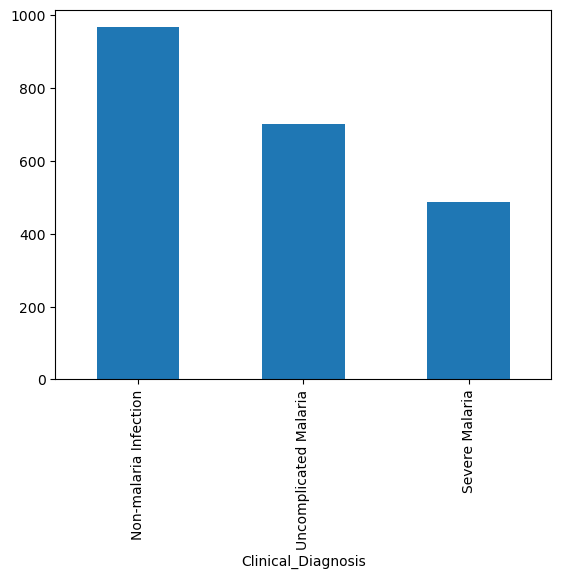

In [64]:
#now let's visualize it! 
subset['Clinical_Diagnosis'].value_counts().plot.bar()

In [66]:
#we can run descriptive statistics on the data
subset.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wbc_count,2156.0,10.723516,5.944994,0.5,6.80,9.30,12.900,53.90
rbc_count,2156.0,3.911679,1.132454,0.5,3.34,4.17,4.650,6.67
hb_level,2156.0,9.423010,2.650261,1.4,7.90,10.20,11.325,18.70
hematocrit,2156.0,29.320223,8.802975,4.3,24.20,31.70,35.500,52.70
mean_cell_volume,2156.0,74.828256,8.046383,7.8,70.00,75.00,80.000,121.00
mean_corp_hb,2156.0,24.142189,3.203595,2.1,22.20,24.10,26.200,38.80
mean_cell_hb_conc,2156.0,32.259318,2.864637,15.7,30.60,32.10,33.425,46.60
platelet_count,2156.0,214.545176,128.697718,3.0,105.00,201.00,300.250,1087.00
platelet_distr_width,2156.0,14.137894,3.064643,0.0,12.90,14.90,15.600,23.90
mean_platelet_vl,2156.0,8.031447,1.194886,3.3,7.20,7.90,8.800,18.60


In [70]:
#How do these features correlate between one another?
subset.corr()

ValueError: could not convert string to float: 'Severe Malaria'

In [78]:
#There was an issue with converting string to floats, so let's see what data types we deal with
subset.dtypes

Clinical_Diagnosis         object
wbc_count                 float64
rbc_count                 float64
hb_level                  float64
hematocrit                float64
mean_cell_volume          float64
mean_corp_hb              float64
mean_cell_hb_conc         float64
platelet_count            float64
platelet_distr_width      float64
mean_platelet_vl          float64
neutrophils_percent       float64
lymphocytes_percent       float64
mixed_cells_percent       float64
neutrophils_count         float64
lymphocytes_count         float64
mixed_cells_count         float64
RBC_dist_width_Percent    float64
dtype: object

In [74]:
#Let's select only numeric columns
numeric_subset = subset.select_dtypes(include=['number'])

In [80]:
#Now, only correlate with numeric numbers
correlation_matrix = numeric_subset.corr()
print(correlation_matrix)

                        wbc_count  rbc_count  hb_level  hematocrit  \
wbc_count                1.000000  -0.217584 -0.283881   -0.261736   
rbc_count               -0.217584   1.000000  0.896557    0.922294   
hb_level                -0.283881   0.896557  1.000000    0.968644   
hematocrit              -0.261736   0.922294  0.968644    1.000000   
mean_cell_volume        -0.150900  -0.017848  0.286931    0.279029   
mean_corp_hb            -0.084770  -0.348335  0.023659   -0.101461   
mean_cell_hb_conc        0.066981  -0.497615 -0.302304   -0.479766   
platelet_count           0.122330   0.409424  0.353828    0.387830   
platelet_distr_width     0.022260   0.001756  0.068770    0.091718   
mean_platelet_vl        -0.100716   0.284809  0.248323    0.285169   
neutrophils_percent      0.093870   0.077574  0.162289    0.119252   
lymphocytes_percent     -0.090940  -0.073216 -0.158665   -0.113198   
mixed_cells_percent     -0.057664  -0.056070 -0.093352   -0.083365   
neutrophils_count   

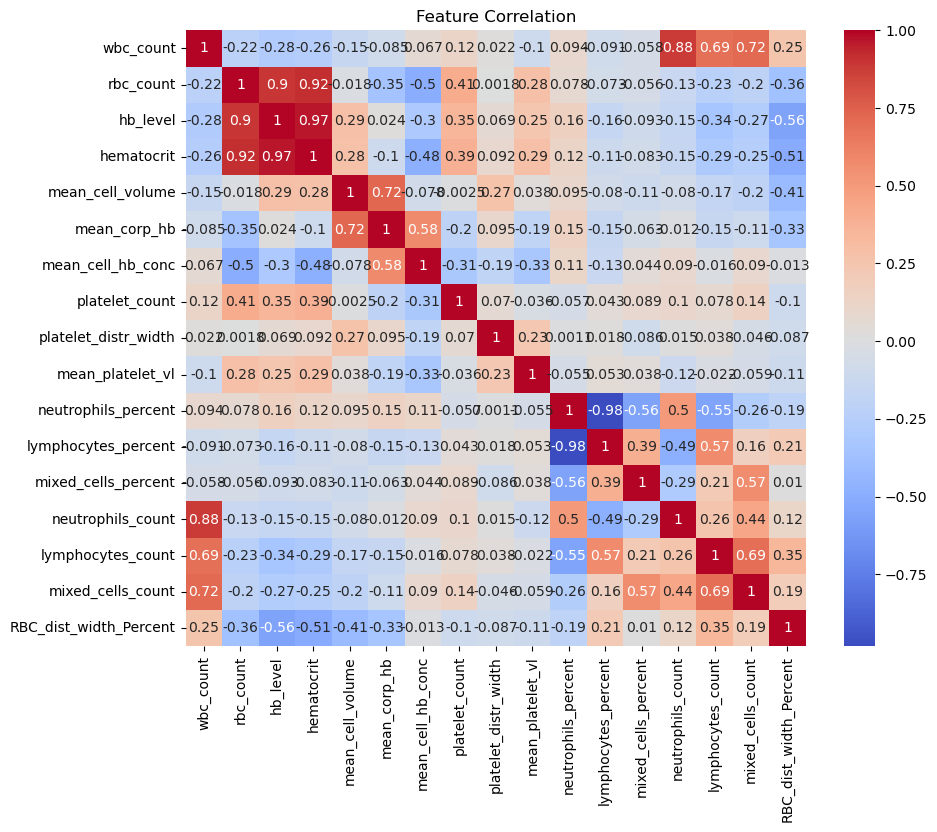

In [84]:
#Lets visualize!
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [ ]:
#Now, we will be doing data preprocessing for more analysis

In [88]:
#First, we will separate the labels/classes from feature and measurements
X=subset.iloc[:,1:]
y=subset.iloc[:,0]

In [90]:
X.shape

(2156, 17)

In [92]:
y.shape

(2156,)

In [94]:
#Now we will encode the labels using scikitlearn to conduct supervised machine learning
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)

In [96]:
#let's check if it worked
y_encoded[0:5]

array([1, 1, 1, 1, 1])

In [98]:
y[0:5]

0    Severe Malaria
1    Severe Malaria
2    Severe Malaria
3    Severe Malaria
4    Severe Malaria
Name: Clinical_Diagnosis, dtype: object

In [100]:
classes=label_encoder.classes_
classes

array(['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria'],
      dtype=object)

In [ ]:
#Now, we will split the data into training and testing sets

In [102]:
#Let's split the data into training and testing sets of ratio 80:20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2)

In [104]:
X_train.shape

(1724, 17)

In [106]:
y_train.shape

(1724,)

In [108]:
X_test.shape

(432, 17)

In [110]:
y_test.shape

(432,)

In [112]:
#We need to standardize the data and scale the data between 0 to 1 
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_scaled=min_max_scaler.fit_transform(X_train)
X_test_scaled=min_max_scaler.fit_transform(X_test)

In [114]:
X_train_scaled[0,0]

0.18503937007874016

In [116]:
X_train.iloc[0,0]

9.9

In [118]:
#Training phase to be done via random forest classifier 
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [120]:
#Now we are in the testing phase and conducting the model prediction on the test set
y_pred=clf.predict(X_test_scaled)

In [122]:
y_pred[0:3]

array([0, 1, 2])

In [124]:
y_test[0:3]

array([0, 2, 2])

In [126]:
classes

array(['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria'],
      dtype=object)

In [128]:
#How well does the model work? We need to run a model evaluation
#To do so, we will use metrics like accuracy, f1 score, recall, precision and confusion matrix

In [132]:
#Importing the metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [134]:
#Balanced accuracy
balanced_accuracy=balanced_accuracy_score(y_test,y_pred)
balanced_accuracy=round(balanced_accuracy,2)
print('balanced accuracy:',balanced_accuracy)

balanced accuracy: 0.7


In [136]:
f1score=f1_score(y_test,y_pred,average='weighted')
f1score=round(f1score,2)
print('f1score:',f1score)

f1score: 0.67


In [138]:
precision=precision_score(y_test,y_pred,average='weighted')
precision=round(precision,2)
print('precision:',precision)

precision: 0.7


In [140]:
recall=recall_score(y_test,y_pred,average='weighted')
recall=round(recall,2)
print('recall:',recall)

recall: 0.68


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2156).

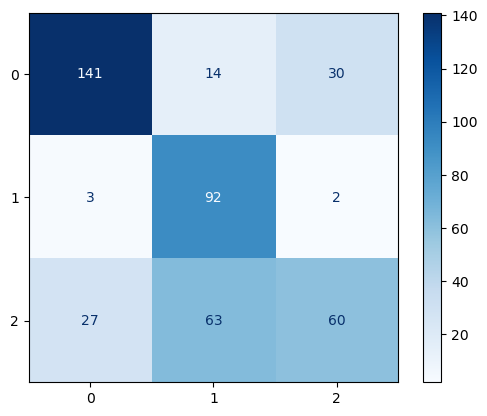

In [146]:
#visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

In [148]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("Unique values in y_test:", set(y_test))
print("Unique values in y_pred:", set(y_pred))

y_test shape: (432,)
y_pred shape: (432,)
Unique values in y_test: {0, 1, 2}
Unique values in y_pred: {0, 1, 2}


In [150]:
print("Labels:", labels)

Labels: ['Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', ..., 'Uncomplicated Malaria', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection']
Length: 2156
Categories (3, object): ['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria']


In [152]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [154]:
cm = confusion_matrix(y_test, y_pred)

In [156]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2156).

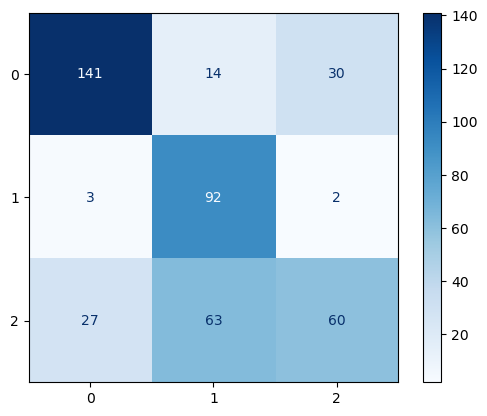

In [158]:
disp.plot(cmap='Blues', xticks_rotation='vertical')

In [ ]:
#The labels are not seen, let's do some troubleshooting

In [162]:
#checking unique classes
print("Unique classes in y_test:", set(y_test))
print("Unique classes in y_pred:", set(y_pred))
print("Labels provided:", labels)

Unique classes in y_test: {0, 1, 2}
Unique classes in y_pred: {0, 1, 2}
Labels provided: ['Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', ..., 'Uncomplicated Malaria', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection']
Length: 2156
Categories (3, object): ['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria']


In [168]:
#Fix labels
labels = sorted(set(y_test).union(set(y_pred)))
print("Corrected labels:", labels)

Corrected labels: [0, 1, 2]


In [170]:
#Redo the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [172]:
#Compute
cm = confusion_matrix(y_test, y_pred, labels=labels)

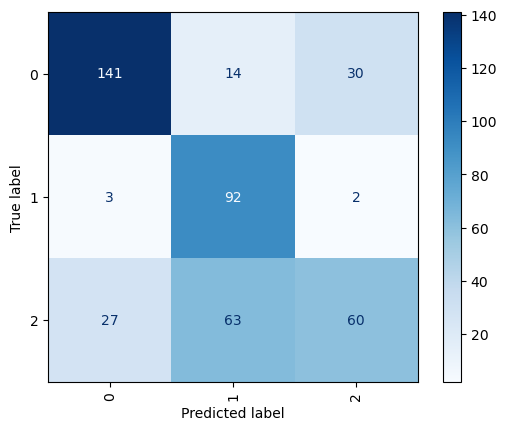

In [174]:
#Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

In [ ]:
#BUt I want the labels to have names, how?

In [176]:
display_labels = ['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria']

In [178]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

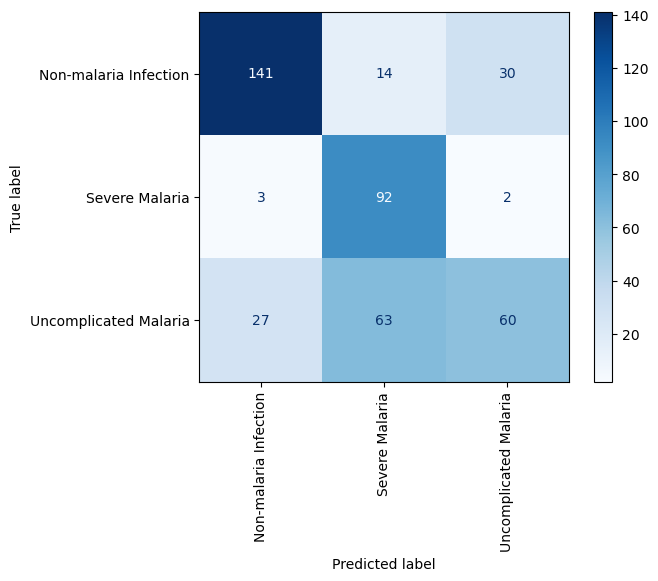

In [180]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Blues', xticks_rotation='vertical')

In [ ]:
#Perfect! You did it!